In [113]:
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
data = pd.read_excel(
    "/helium/analysis/SACLA_2017B8065_Takanashi/Compare KERs and angles.xlsx",
    sheet_name=None)

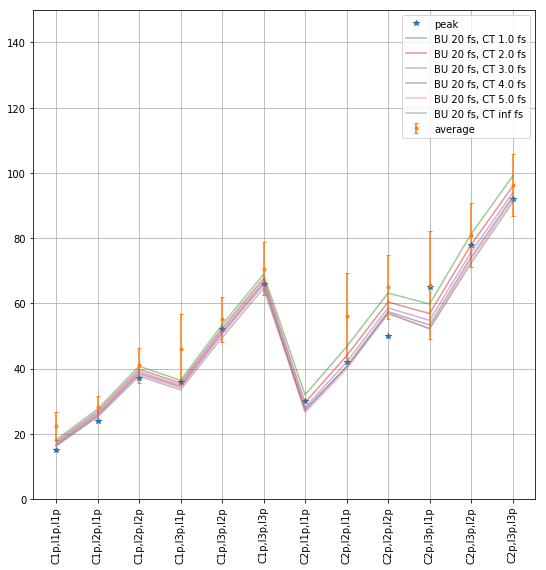

In [119]:
plt.figure(figsize=(9, 9))
df = data["Exp KERs"]
where = slice(None)
d = df[where].pivot(index="Target", columns="Name", values="Value (eV)")
plt.plot(d.index, d["peak"], "*")
plt.errorbar(
    d.index, d["average"], d["sigma"] / 2,
    fmt=".",
    capsize=2,
)

df = data["Simul KERs"]
where = df["BU time (fs)"] == 20
for (butime, tctime), d in df[where].groupby(["BU time (fs)", "CT time (fs)"]):
    plt.plot(
        d["Target"],
        d["Value (eV)"],
        label="BU {} fs, CT {} fs".format(butime, tctime),
        alpha=0.5,
    )
plt.xticks(rotation='vertical')
plt.grid(True)
plt.ylim(0, 150)
plt.legend()
plt.show()

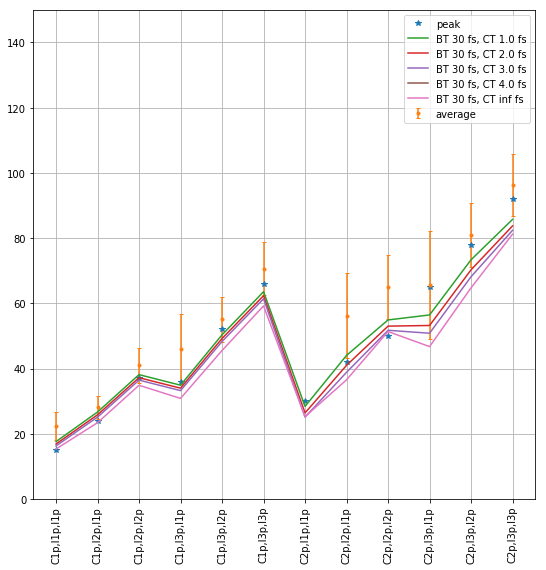

In [116]:
plt.figure(figsize=(9, 9))
df = data["Exp KERs"]
where = slice(None)
d = df[where].pivot(index="Target", columns="Name", values="Value (eV)")
plt.plot(d.index, d["peak"], "*")
plt.errorbar(
    d.index, d["average"], d["sigma"] / 2,
    fmt=".",
    capsize=2,
)

df = data["Simul KERs"]
where = df["BU time (fs)"] == 30
for (butime, tctime), d in df[where].groupby(["BU time (fs)", "CT time (fs)"]):
    plt.plot(d["Target"], d["Value (eV)"], label="BT {} fs, CT {} fs".format(butime, tctime))
plt.xticks(rotation='vertical')
plt.grid(True)
plt.ylim(0, 150)
plt.legend()
plt.show()

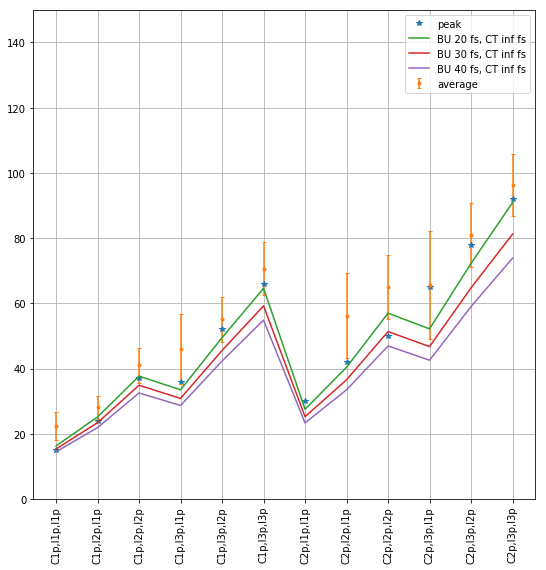

In [120]:
plt.figure(figsize=(9, 9))
df = data["Exp KERs"]
where = slice(None)
d = df[where].pivot(index="Target", columns="Name", values="Value (eV)")
plt.plot(d.index, d["peak"], "*")
plt.errorbar(
    d.index, d["average"], d["sigma"] / 2,
    fmt=".",
    capsize=2,
)

df = data["Simul KERs"]
where = df["CT time (fs)"] == float("inf")
for (butime, tctime), d in df[where].groupby(["BU time (fs)", "CT time (fs)"]):
    plt.plot(d["Target"], d["Value (eV)"], label="BU {} fs, CT {} fs".format(butime, tctime))
plt.xticks(rotation='vertical')
plt.grid(True)
plt.ylim(0, 150)
plt.legend()
plt.show()

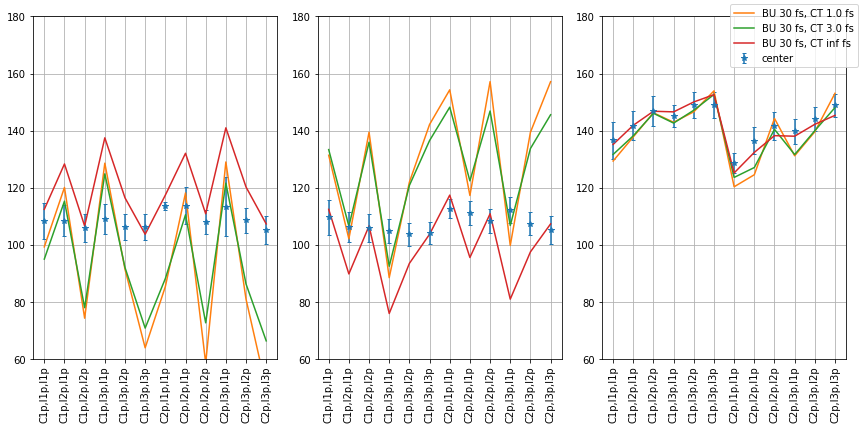

In [121]:
plt.figure(figsize=(12, 6))
for i, k in enumerate([
        "btw 1st and 2nd",
        "btw 1st and 3rd",
        "btw 2nd and 3rd"]):
    plt.subplot(1, 3, i+1)
    df = data["Exp angles"]
    where = df["Which angle"] == k
    d = df[where].pivot(index="Target", columns="Name", values="Value (deg)")
    plt.errorbar(
        d.index, d["center"], d["sigma"] / 2,
        fmt="*",
        capsize=2,
    )

    df = data["Simul angles"]
    where = ((df["Which angle"] == k)
             & (df["BU time (fs)"] == 30))
    for (butime, tctime), d in df[where].groupby(["BU time (fs)", "CT time (fs)"]):
        plt.plot(d["Target"], d["Value (deg)"], label="BU {} fs, CT {} fs".format(butime, tctime))

    if i == 0:
        plt.figlegend()
    plt.xticks(rotation='vertical')
    plt.ylim(60, 180)
    plt.grid(True)
plt.tight_layout()
plt.show()

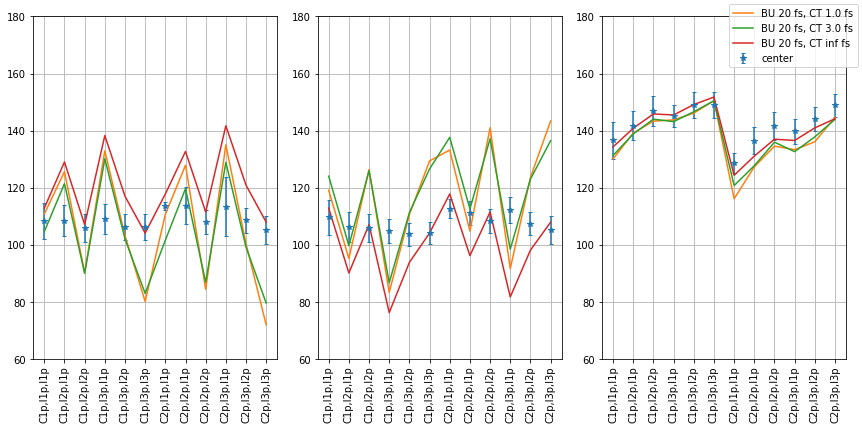

In [124]:
plt.figure(figsize=(12, 6))
for i, k in enumerate([
        "btw 1st and 2nd",
        "btw 1st and 3rd",
        "btw 2nd and 3rd"]):
    plt.subplot(1, 3, i+1)
    df = data["Exp angles"]
    where = df["Which angle"] == k
    d = df[where].pivot(index="Target", columns="Name", values="Value (deg)")
    plt.errorbar(
        d.index, d["center"], d["sigma"] / 2,
        fmt="*",
        capsize=2,
    )

    df = data["Simul angles"]
    where = ((df["Which angle"] == k)
             & (df["BU time (fs)"] == 20))
    for (butime, tctime), d in df[where].groupby(["BU time (fs)", "CT time (fs)"]):
        plt.plot(d["Target"], d["Value (deg)"], label="BU {} fs, CT {} fs".format(butime, tctime))

    if i == 0:
        plt.figlegend()
    plt.xticks(rotation='vertical')
    plt.ylim(60, 180)
    plt.grid(True)
plt.tight_layout()
plt.show()

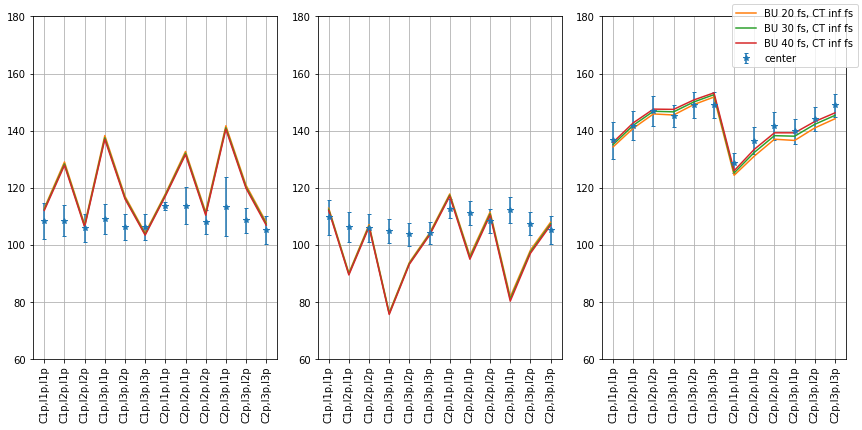

In [125]:
plt.figure(figsize=(12, 6))
for i, k in enumerate([
        "btw 1st and 2nd",
        "btw 1st and 3rd",
        "btw 2nd and 3rd"]):
    plt.subplot(1, 3, i+1)
    df = data["Exp angles"]
    where = df["Which angle"] == k
    d = df[where].pivot(index="Target", columns="Name", values="Value (deg)")
    plt.errorbar(
        d.index, d["center"], d["sigma"] / 2,
        fmt="*",
        capsize=2,
    )

    df = data["Simul angles"]
    where = ((df["Which angle"] == k)
             & (df["CT time (fs)"] == float("inf")))
    for (butime, tctime), d in df[where].groupby(["BU time (fs)", "CT time (fs)"]):
        plt.plot(d["Target"], d["Value (deg)"], label="BU {} fs, CT {} fs".format(butime, tctime))

    if i == 0:
        plt.figlegend()
    plt.xticks(rotation='vertical')
    plt.ylim(60, 180)
    plt.grid(True)
plt.tight_layout()
plt.show()

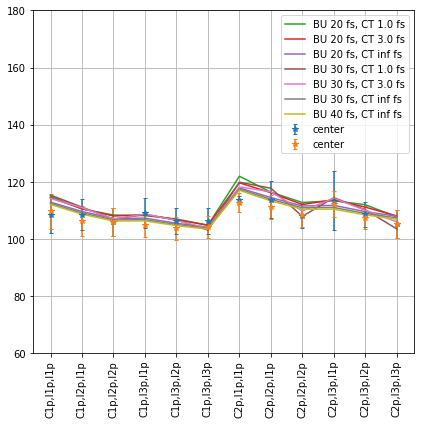

In [160]:
plt.figure(figsize=(6, 6))
df = data["Exp angles"]
# where = df["Which angle"].isin(["btw 1st and 2nd", "btw 1st and 3rd"])
# d = df[where].groupby(["Target", "Name"]).mean().reset_index().pivot(index="Target", columns="Name", values="Value (deg)")
# plt.errorbar(
#     d.index, d["center"], d["sigma"] / 2,
#     fmt="*",
#     capsize=2,
# )
where = df["Which angle"].isin(["btw 1st and 2nd"])
d = df[where].groupby(["Target", "Name"]).mean().reset_index().pivot(index="Target", columns="Name", values="Value (deg)")
plt.errorbar(
    d.index, d["center"], d["sigma"] / 2,
    fmt="*",
    capsize=2,
)
where = df["Which angle"].isin(["btw 1st and 3rd"])
d = df[where].groupby(["Target", "Name"]).mean().reset_index().pivot(index="Target", columns="Name", values="Value (deg)")
plt.errorbar(
    d.index, d["center"], d["sigma"] / 2,
    fmt="*",
    capsize=2,
)

df = data["Simul angles"]
where = df["Which angle"].isin(["btw 1st and 2nd", "btw 1st and 3rd"])
for (butime, tctime), d in df[where].groupby(["BU time (fs)",
                                              "CT time (fs)",
                                              "Target"])["Value (deg)"].mean().reset_index().groupby(["BU time (fs)", "CT time (fs)"]):
    plt.plot(d["Target"], d["Value (deg)"], label="BU {} fs, CT {} fs".format(butime, tctime))
plt.legend()
plt.xticks(rotation='vertical')
plt.ylim(60, 180)
plt.grid(True)
plt.tight_layout()
plt.show()